In [19]:
# import libs especially pandas b/c pandas is a nice name
import pandas as pd, os, matplotlib.pyplot as plt, numpy as np
from sklearn.decomposition import PCA


In [35]:
# Read normalized csv file
df_data = pd.read_csv('/home/matthewdshen/GitHub/urban_data_project/analysis/normalized/clean_normalized.csv') # TODO: fix path problem

# Annotation list
lst_annotate = list(df_data['NAME'])

# Make zipcode to index of dataframe
# df_data.set_index('NAME', inplace = True)
df_data.drop(columns = ['NAME'])

# Normalization
X = df_data.values.copy()
non_normalized_X = df_data.values.copy()
for j in range(X.shape[1]):
    non_normalized_X[:, j] = non_normalized_X[:, j] - non_normalized_X[:, j].mean()
    X[:, j] = (X[:, j] - X[:, j].mean()) / X[:, j].std()


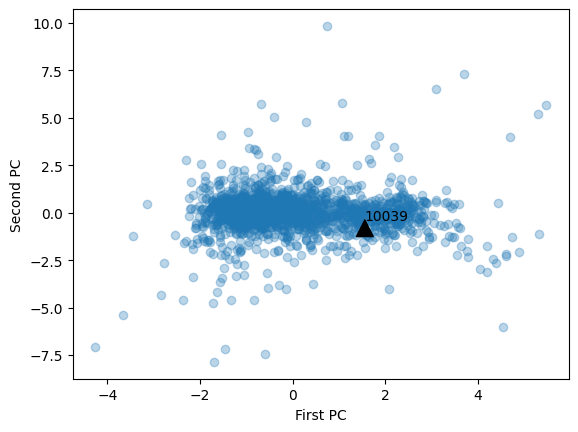

In [42]:
# Apply PCA model
model = PCA(n_components=X.shape[1])
model.fit(X)

# Transform the exisitng model
transformed_X = model.transform(X)

# Get index of williamsburg
int_zip_index = lst_annotate.index(10039)


# Plot first and second PC
plt.scatter(transformed_X[:,0], transformed_X[:,1], alpha = 0.3)
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.annotate(lst_annotate[int_zip_index],(transformed_X[int_zip_index,0], transformed_X[int_zip_index,1]),arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

In [ ]:
# Print out model components with respective feature
component_weights = pd.DataFrame({'PC 1':model.components_[0, :], 
                                 'PC 2':model.components_[1, :], 
                                 'features':df_data.columns}).sort_values(by='PC 1')[::-1]
max_val = np.abs(component_weights[['PC 1', 'PC 2']].values).max()
component_weights.style.background_gradient(cmap='bwr', vmin=-max_val, vmax=max_val) # weight color

,PC 1,PC 2,features
5,0.471548,-0.403071,gross_rent_median_price_delta
0,0.282735,0.380141,median_age_delta
2,0.228683,-0.487308,household_income_delta
4,-0.093966,-0.570014,bachelors_percent_delta
1,-0.522714,-0.353829,white_non-hispanic_percent_delta
3,-0.602783,0.073802,foreign_born_not_a_us_citizen_percent_delta
